#### **EDA (Exploración y Analisis de los Datos)**
**Se inicializa el proceso con la importación de los archivos procesados y almacenados en formato parquet resultantes del ETL**

1.	Dimensiones y tipos de datos: Se ha validado las dimensiones de cada dataframe y los tipos de datos allí contenidos.
        •   Los dataframe del proyecto tienen dataframes que van desde las 43 hsta las 18884 filas y de las 5 a las 25 columnas
        •   Los dos dataframe mas grandes, con dimensiones de 43x25 y 1032x21, tienen campos con 1 nulo y de 24 a 32 nulos respectivamete, su impacto es inferior al 1% en el primer caso por lo cual no se le realiza imputación alguna, en el caso del segunda dataframe donde el impacto llegaría maximo al  3,1% de su cantidad de datos por campo entonces se le realiza imputacion a su media aritmetica ya que obedece a campos realacionados con accesos y velocidades de internet.
	    •	La revision de los tipos de valores de cada campo ya se habia realizado en el ETL sin embargo se corrobora Revisar los tipos de datos (numéricos, categóricos, fechas, booleanos, etc.) para confirmar que estén alineados con lo esperado tras el ETL.

    | Campo                            | Tipo de Dato | Tipo Variable        | Descripción                                          |
    |----------------------------------|--------------|----------------------|------------------------------------------------------|
    | Año                              | Int64        | Numérica discreta    | Año en formato entero (ej. 2019)                     |
    | Trimestre                        | Int64        | Numérica discreta    | Trimestre del año (1, 2, 3, 4)                       |
    | Provincia                        | category     | Categórica nominal   | Nombre de la Provincia                               |
    | "campos asociados a velocidades" | float64      | Numérica continua    | Velocidad promedio de bajada en Mbps                 |
    | "Campos asociados a accesos"     | float64      | Numérica continua    | Cantidad de accesos a Internet                       |
    | Periodo                          | category     | Categórica ordinal   | Trimestre representado en Año y meses comprendidos   |
    | Ingresos                         | float64      | Numérica continua    | Dinero generado en Ingresos                          |
        
    2.	Valores nulos y duplicados: Se descarta duplicidad en los datos Categoricos de las Provincias, en el caso de los datos nulos son pocas las ocurrencias por lo cual para el EDA no impactaría o afectaria el analisis.

In [ ]:
import pandas as pd
from functions import *
opciones_impresion() # Invocar la función para mejorar la impresion y que no se recorte la información al imprimir.

# Se inicializa el proceso con la importación de los archivos parquet resultantes del ETL:

df_internet_nacional = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data_parquet/df_internet_nacional.parquet')
df_internet_provincias = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data_parquet/df_internet_provincias.parquet')
df_internet_Acc_vel_loc_sinrangos = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data_parquet/df_internet_Acc_vel_loc_sinrangos.parquet')
df_internet_Velocidad_sin_Rangos = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data_parquet/df_internet_Velocidad_sin_Rangos.parquet')
df_internet_Dial_BAf = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data_parquet/df_internet_Dial_BAf.parquet')

print("El dataframe {} tiene una dimensión de: {}".format("df_internet_nacional", df_internet_nacional.shape),"\n",validar_df(df_internet_nacional),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_provincias", df_internet_provincias.shape),"\n",validar_df(df_internet_provincias),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Acc_vel_loc_sinrangos", df_internet_Acc_vel_loc_sinrangos.shape),"\n",validar_df(df_internet_Acc_vel_loc_sinrangos),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Velocidad_sin_Rangos", df_internet_Velocidad_sin_Rangos.shape),"\n",validar_df(df_internet_Velocidad_sin_Rangos),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Dial_BAf", df_internet_Dial_BAf.shape),"\n",validar_df(df_internet_Dial_BAf))


El dataframe df_internet_nacional tiene una dimensión de: (43, 25) 
                             Tipo de Dato Int Int64 Float Bool DateT Str Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string) Media            Desviación_Std   Mínimo         Q1_25%          Q2_50%           Q3_75%           Máximo        Negativos
Año                            int64      43  0      0    0    0      0  NaN    43       0     12       0   NaN                 2019.093023         3.734103           2014          2016.0           2019.0           2021.5          2033    0     
Trimestre                      int64      43  0      0    0    0      0  NaN    43       0      4       0   NaN                    2.418605         1.138766              1             1.0              2.0              3.0             4    0     
Tot_Vel_Media_DL             float64       0  0     42    0    0      0  NaN    42       1     43       0   NaN                   39.334762        43.643195       3.617127        6.038428      

- Se imputan los datos nulos de los campos "Tot_Vel_Media_DL_Trim_x_Prov, Tot_Acc_ADSL_x_Prov, Tot_Acc_CaModem_x_Prov, Tot_Acc_FO_x_Prov, Tot_Acc_Wireless_x_Prov, Tot_Acc_Otros_x_Prov, Tot_Acc_x_Prov, Tot_pntrcion_x_c100_Habi_x_Prov, Tot_pntrcion_x_c100_Hoga_x_Prov, Tot_Acc_rango_0->512_kbps_x_Prov, Tot_Acc_rango_0.512->1_Mbps_x_Prov, Tot_Acc_rango_1->6_Mbps_x_Prov, Tot_Acc_rango_6->10_Mbps_x_Prov, Tot_Acc_rango_10->20_Mbps_x_Prov, Tot_Acc_rango_20->30_Mbps_x_Prov, Tot_Acc_rango_>30_Mbps_x_Prov, Tot_Acc_rango_Otros_Mbps_x_Prov, Tot_Acc_rango_Mbps_x_Prov" en el dataframe "df_internet_provincias" a su media aritmetica respectivamente:

In [3]:
# Se imputan los datos nulos de los campos "Tot_Vel_Media_DL_Trim_x_Prov", "Tot_Acc_ADSL_x_Prov", "Tot_Acc_CaModem_x_Prov", "Tot_Acc_FO_x_Prov", "Tot_Acc_Wireless_x_Prov", "Tot_Acc_Otros_x_Prov", "Tot_Acc_x_Prov", "Tot_pntrcion_x_c100_Habi_x_Prov", "Tot_pntrcion_x_c100_Hoga_x_Prov", "Tot_Acc_rango_0->512_kbps_x_Prov", "Tot_Acc_rango_0.512->1_Mbps_x_Prov", "Tot_Acc_rango_1->6_Mbps_x_Prov", "Tot_Acc_rango_6->10_Mbps_x_Prov", "Tot_Acc_rango_10->20_Mbps_x_Prov", "Tot_Acc_rango_20->30_Mbps_x_Prov", "Tot_Acc_rango_>30_Mbps_x_Prov", "Tot_Acc_rango_Otros_Mbps_x_Prov", "Tot_Acc_rango_Mbps_x_Prov" en el dataframe "df_internet_provincias" a su media aritmetica respectivamente:

campos_a_imputar = [
    "Tot_Vel_Media_DL_Trim_x_Prov",
    "Tot_Acc_ADSL_x_Prov",
    "Tot_Acc_CaModem_x_Prov",
    "Tot_Acc_FO_x_Prov",
    "Tot_Acc_Wireless_x_Prov",
    "Tot_Acc_Otros_x_Prov",
    "Tot_Acc_x_Prov",
    "Tot_pntrcion_x_c100_Habi_x_Prov",
    "Tot_pntrcion_x_c100_Hoga_x_Prov",
    "Tot_Acc_rango_0->512_kbps_x_Prov",
    "Tot_Acc_rango_0.512->1_Mbps_x_Prov",
    "Tot_Acc_rango_1->6_Mbps_x_Prov",
    "Tot_Acc_rango_6->10_Mbps_x_Prov",
    "Tot_Acc_rango_10->20_Mbps_x_Prov",
    "Tot_Acc_rango_20->30_Mbps_x_Prov",
    "Tot_Acc_rango_>30_Mbps_x_Prov",
    "Tot_Acc_rango_Otros_Mbps_x_Prov",
    "Tot_Acc_rango_Mbps_x_Prov"
]

df_internet_provincias = imputar_media(df_internet_provincias, campos_a_imputar)
print(validar_df(df_internet_provincias))

                                   Tipo de Dato Int   Int64 Float Bool DateT Str   Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string) Media          Desviación_Std Mínimo    Q1_25%     Q2_50%     Q3_75%       Máximo      Negativos
Año                                   int64      1032  0        0  0    0        0  NaN    1032     0       11     0   NaN               2018.883721        3.10596      2014     2016.0     2019.0       2022.0        2024    0     
Trimestre                             int64      1032  0        0  0    0        0  NaN    1032     0        4     0   NaN                  2.488372       1.128874         1        1.0        2.0          4.0           4    0     
Provincia                            object         0  0        0  0    0     1032  NaN    1032     0       24   NaN     0                       NaN            NaN       NaN        NaN        NaN          NaN         NaN  NaN     
Tot_Vel_Media_DL_Trim_x_Prov        float64         0  0     1032  0    0   

Tras la depuración de los datos proseguimos con la reviion en detalle del cotenido a nivel de datos y lo que representan para el analisis:

1. Revisión y limpieza de valores atípicos:
	-	Se identifican valores negativos en 4 datos del campo "Accesos" los cuales se imputan a valores positivos asumiendo pudo ser un error de digitación o carga, y considerando no se darian accesos negativos ya que eso obedeceria es a otro tipo de indicador asociado a bajas o shurn.

In [ ]:
import time
# Imputamos los valores negativos en el campos "Accesos" del dataframe "df_internet_Acc_vel_loc_sinrangos" los cuales seran reemplazados por su valor absoluto:
valores_negativos = df_internet_Acc_vel_loc_sinrangos["Accesos"][df_internet_Acc_vel_loc_sinrangos["Accesos"] < 0]
print("Valores negativos en 'Accesos':")
print(valores_negativos)
df_internet_Acc_vel_loc_sinrangos.loc[df_internet_Acc_vel_loc_sinrangos["Accesos"] < 0, "Accesos"] = df_internet_Acc_vel_loc_sinrangos["Accesos"].abs() # Reemplazamos por su valor absoluto.

Valores negativos en 'Accesos':
7172    -5582.0
7226     -590.0
10597    -830.0
12699      -1.0
Name: Accesos, dtype: float64
7172    -5582.0
7226     -590.0
10597    -830.0
12699      -1.0
Name: Accesos, dtype: float64


-   Validamos sesgos en las variables numericas continuas para identificar la necesidad de buscar posibles outlayers posteriormente

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de columnas numéricas continuas a evaluar para identificación de sesgos:
columnas_continuas = [
    "Tot_Vel_Media_DL", "Tot_Acc_ADSL", "Tot_Acc_CaModem", "Tot_Acc_FO",
    "Tot_Acc_Wireless", "Tot_Acc_Otros", "Total",
    "Tot_pntrcion_x_c100_Hoga", "Tot_pntrcion_x_c100_Habi", "Tot_Acc_rango_0_512_kbps",
    "Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_1->6_Mbps", "Tot_Acc_rango_6->10_Mbps",
    "Tot_Acc_rango_10->20_Mbps", "Tot_Acc_rango_20->30_Mbps", "Tot_Acc_rango_>30_Mbps",
    "Tot_Acc_rango_Otros", "Tot_Acc_rango", "Tot_B_Ancha_Fija", "Tot_DialUp",
    "Tot_DialUp_+_B_Ancha_Fija", "Ingresos (miles de pesos)"
]

# Iterar sobre las columnas y calcular el sesgo para las que existan en el DataFrame
for col in columnas_continuas:
    if col in df_internet_nacional.columns:
        skew_val = df_internet_nacional[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

Tot_Vel_Media_DL: skewness = 1.33
Tot_Acc_ADSL: skewness = -0.49
Tot_Acc_CaModem: skewness = -0.14
Tot_Acc_FO: skewness = 1.05
Tot_Acc_Wireless: skewness = 0.18
Tot_Acc_Otros: skewness = -0.09
Total: skewness = 0.26
Tot_pntrcion_x_c100_Hoga: skewness = 0.24
Tot_pntrcion_x_c100_Habi: skewness = 0.25
Tot_Acc_rango_0_512_kbps: skewness = 2.92
Tot_Acc_rango_0.512->1_Mbps: skewness = 1.08
Tot_Acc_rango_1->6_Mbps: skewness = -0.17
Tot_Acc_rango_6->10_Mbps: skewness = -1.29
Tot_Acc_rango_10->20_Mbps: skewness = 0.77
Tot_Acc_rango_20->30_Mbps: skewness = 1.11
Tot_Acc_rango_>30_Mbps: skewness = 0.58
Tot_Acc_rango_Otros: skewness = 0.15
Tot_Acc_rango: skewness = 0.22
Tot_B_Ancha_Fija: skewness = 0.25
Tot_DialUp: skewness = 0.21
Tot_DialUp_+_B_Ancha_Fija: skewness = 0.26
Ingresos (miles de pesos): skewness = 3.38


- Para el dataframe "df_internet_nacional" con los resulados obtenidos se identifica sesgo a la derecha para los campos:
    - Tot_Vel_Media_DL: skewness = 1.33, Tot_Acc_rango_0_512_kbps: skewness = 2.92, Tot_Acc_rango_0.512->1_Mbps: skewness = 1.08, Tot_Acc_rango_20->30_Mbps: skewness = 1.11, Ingresos (miles de pesos): skewness = 3.38, porque sus valores skewness son positivos y superiores a 1.
- Con los resulados obtenidos se identifica sesgo a la izquierda para los campos:
    - Tot_Acc_rango_6->10_Mbps: skewness = -1.29, porque su valore skewness es negativo e inferios a -1
- Para el campo con el sesgo mas marcado que corresponde a "Ingresos (miles de pesos)": skewness = 3.38 hacemos una transformación bajo las técnicas de Raiz Cuadrada y Logaritmica, luego comparamos visualmente su efecto:

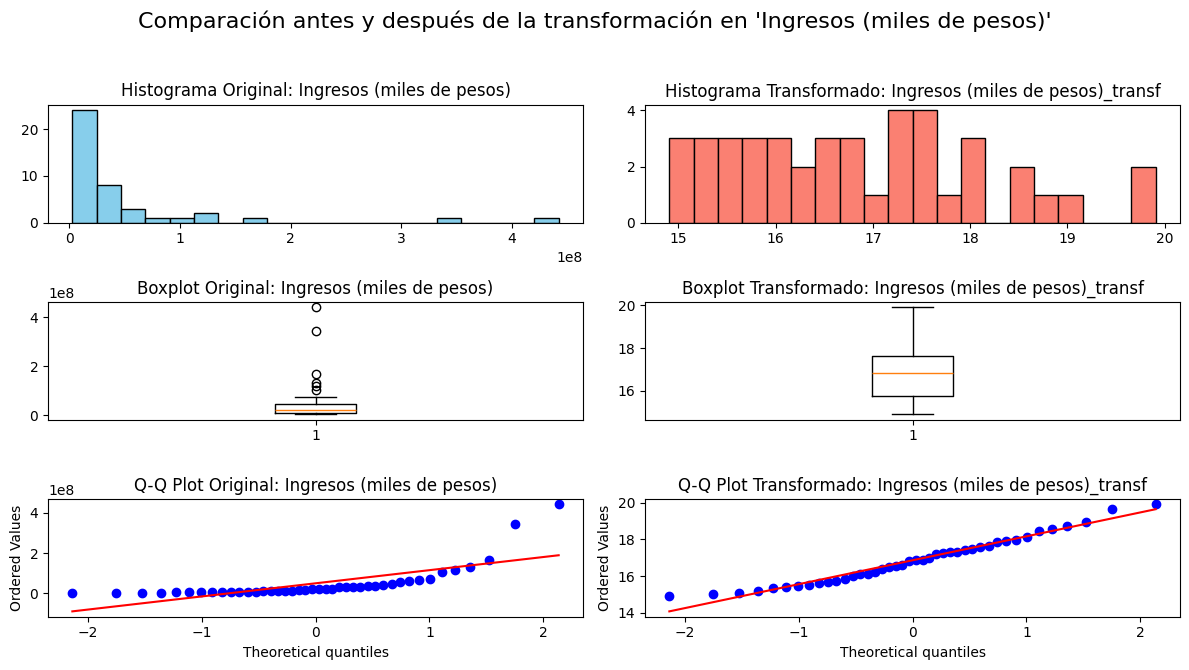

In [8]:
from functions import * # Importar todas las funciones del módulo functions.py

df_transformado = transformar_y_visualizar(df_internet_nacional, "Ingresos (miles de pesos)", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)

In [10]:
# df_internet_Acc_vel_loc_sinrangos
import pandas as pd
import matplotlib.pyplot as plt

# Lista de columnas numéricas continuas a evaluar para identificación de sesgos:
columnas_continuas = ["Velocidad (Mbps)", "Provincia"]

# Iterar sobre las columnas y calcular el sesgo para las que existan en el DataFrame
for col in columnas_continuas:
    if col in df_internet_Acc_vel_loc_sinrangos.columns:
        skew_val = df_internet_Acc_vel_loc_sinrangos[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

Velocidad (Mbps): skewness = 0.69


TypeError: could not convert string to float: 'Buenos Aires'

In [ ]:
#Tot_B_Ancha_Fija_x_Prov,Tot_DialUp_x_Prov,Tot_DialUp_+_B_Ancha_Fija_x_Prov

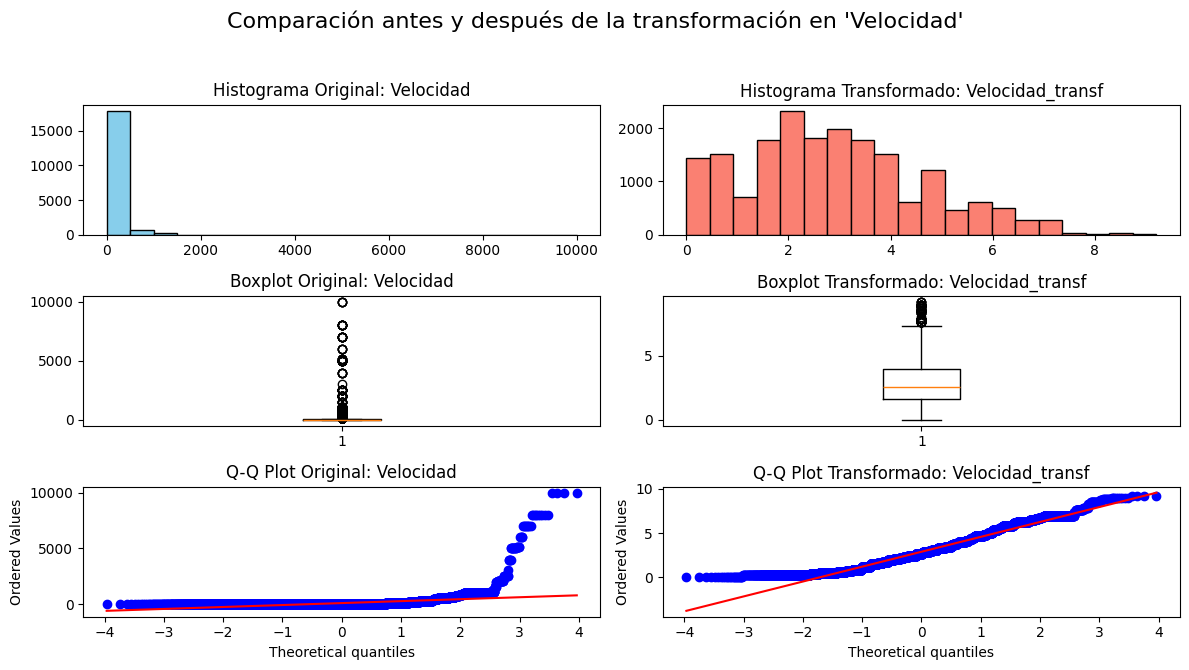

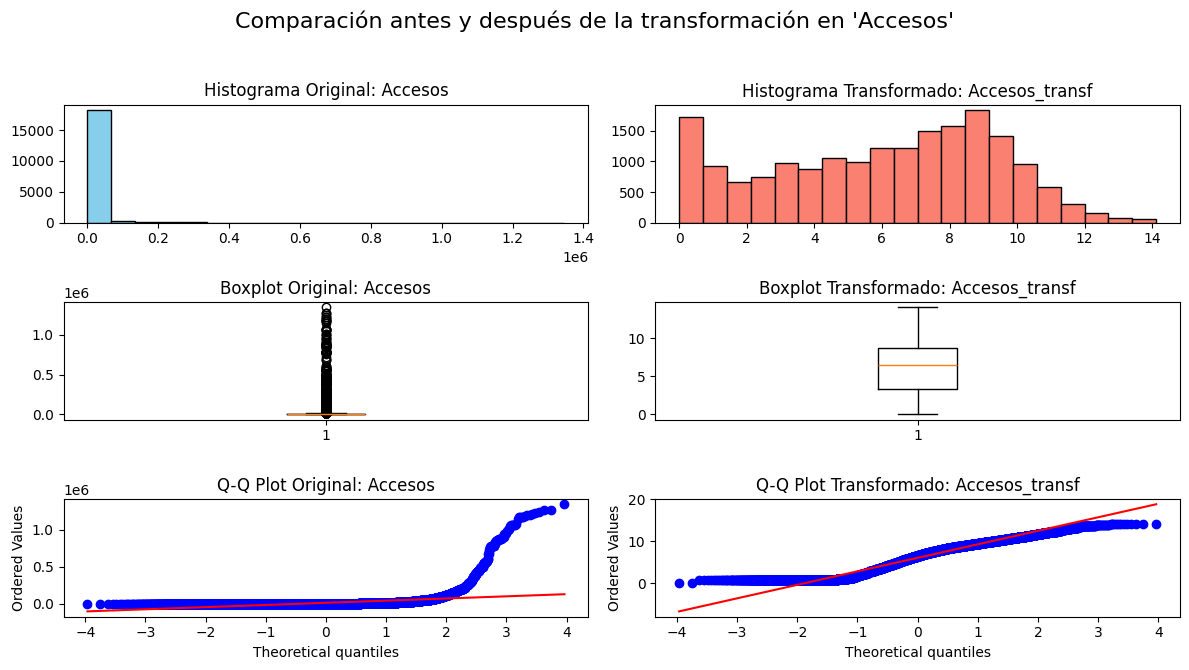

In [7]:
#Velocidad,Accesos
from functions import * # Importar todas las funciones del módulo functions.py

df_transformado = transformar_y_visualizar(df_internet_Velocidad_sin_Rangos, "Velocidad", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)
df_transformado = transformar_y_visualizar(df_internet_Velocidad_sin_Rangos, "Accesos", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)

- Se revisa cada campo en busca de Outliers, se determina si se mantienen o si se suavizarán (winsorizing) o si se filtrarán los más extremos.

2. Conversión final de tipos de datos
	•	Ya viste que hay columnas object (strings) que tal vez puedan convertirse en category o en datetime si aplica.
	•	Por ejemplo, la columna "Periodo" podría ser un string que quizás quieras convertir en un datetime si está en un formato de fecha (Ene-Mar 2014, etc.), o mantenerla como string/categoría.
	•	Si hay columnas que se sabe que son “etiquetas” (ej: “Provincia”), considera convertirlas a category si no lo has hecho todavía en el CSV.

3. Integridad y consistencia
	•	Asegúrate de que las combinaciones de Año+Trimestre (o Año+Trimestre+Provincia) sean coherentes. Si hay duplicados inesperados, revisa por qué.
	•	Confirma que no haya valores duplicados que no tengan sentido, o registros repetidos por error.

4. Quick EDA univariado

Para cada DataFrame, podrías:
	•	Describir cada columna con df.describe() y df['col'].value_counts() (para variables categóricas).
	•	Visualizar histogramas o boxplots simples (por ejemplo, con matplotlib o seaborn) para las columnas numéricas más relevantes.

In [8]:
# Revisamos la presencia de Outlayers de cada variable tipo numerica en cada dataframe:
print("Outlayers en 'df_internet_nacional':")
outlayers(df_internet_nacional)
print("\n")
print("Outlayers en 'df_internet_provincias':")
outlayers(df_internet_provincias)
print("\n")
print("Outlayers en 'df_internet_Acc_vel_loc_sinrangos':")
outlayers(df_internet_Acc_vel_loc_sinrangos)
print("\n")
print("Outlayers en 'df_internet_Velocidad_sin_Rangos':")
outlayers(df_internet_Velocidad_sin_Rangos)
print("\n")
print("Outlayers en 'df_internet_Dial_BAf':")
outlayers(df_internet_Dial_BAf)

Outlayers en 'df_internet_nacional':


NameError: name 'outlayers' is not defined

In [ ]:
# 


*** df_internet_nacional ***


AttributeError: 'str' object has no attribute 'dtypes'

2. Análisis estadístico y distribuciones
	1.	Estadísticas descriptivas
	    •	Revisar las estadísticas básicas de las columnas numéricas: .describe().
	    •	Observar la media, desviación estándar, mínimos, máximos, cuartiles, etc.
    2.	Conteo de valores categóricos
	    •	Para columnas como Provincia, Partido, Localidad, etc., revisar la distribución con .value_counts().
	    •	Detectar categorías con muy pocos datos o atípicas.
	3.	Distribución de los datos
	    •	Histograma de variables clave (por ejemplo, accesos, velocidades, penetraciones).
	    •	Boxplots para detectar outliers (por ejemplo, boxplot de velocidad media o de accesos).

In [ ]:
n

3. Exploración de relaciones y tendencias
	1.	Relaciones entre variables
	    •	Graficar relación entre velocidad y accesos, o entre penetración y provincia.
	    •	Correlaciones: df_internet_nacional.corr() (solo para numéricos).
    2.	Análisis temporal (si aplica)
	    •	Si existen columnas de trimestre/año, analizar la evolución de ciertos indicadores a lo largo del tiempo (por ejemplo, velocidad media o total de accesos).
	3.	Análisis por provincia/partido/localidad (segmentación geográfica)
	    •	Comparar promedios o totales de accesos y velocidad por provincia (barras, boxplots, etc.).

4. Conclusiones preliminares
	1.	Principales hallazgos
	    •	Provincias con mayor número de accesos.
	    •	Provincias con mayor velocidad media.
	    •	Evolución temporal de penetración, accesos, etc.
	2.	Problemas detectados
	    •	Columnas con muchos nulos.
	    •	Posibles valores atípicos o inconsistentes.
	    •	Variables que no aportan información o que podrían fusionarse.
	3.	Decisiones para el Dashboard
	    •	Identificar qué métricas se van a mostrar (velocidad, accesos, penetración, ingresos, etc.).
	    •	Definir filtros relevantes (por provincia, año, trimestre).

In [ ]:
asd